# India Student Depression Project

> *Héloïse PELTIER TORROELLA - Olga GEOFFROY - Manon HAMEL*

## Importations ⬇️

In [1]:
# Imports de Librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Import & visualisation du dataset

df = pd.read_csv("student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


## Exploratory Data Analysis 🔎

In [3]:
# Print the shape of dataset in the form of (#rows, #columns)
print(df.shape)

# Describe dataset's main statistics
print(df.describe(include="all"))

(27901, 18)
                   id Gender           Age    City Profession  \
count    27901.000000  27901  27901.000000   27901      27901   
unique            NaN      2           NaN      52         14   
top               NaN   Male           NaN  Kalyan    Student   
freq              NaN  15547           NaN    1570      27870   
mean     70442.149421    NaN     25.822300     NaN        NaN   
std      40641.175216    NaN      4.905687     NaN        NaN   
min          2.000000    NaN     18.000000     NaN        NaN   
25%      35039.000000    NaN     21.000000     NaN        NaN   
50%      70684.000000    NaN     25.000000     NaN        NaN   
75%     105818.000000    NaN     30.000000     NaN        NaN   
max     140699.000000    NaN     59.000000     NaN        NaN   

        Academic Pressure  Work Pressure          CGPA  Study Satisfaction  \
count        27901.000000   27901.000000  27901.000000        27901.000000   
unique                NaN            NaN           

In [4]:
# Affichage des types de valeurs

print(df.dtypes)

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object


In [5]:
# Programmation de l'esthétique des graphs

sns.set_theme(style="ticks")
sns.set_palette("Set2")

#### *Target : Depression* 🎯

Notre Dataset est relativement équilibré avec 59% d'étudiants en dépression et 41% d'étudiants en bonne santé. Bien que ce ratio ne soit probablement pas représentatif de la population réelle des étudiants, nous pouvons conserver ces proportions pour entraîner notre modèle.

Depression
1    16336
0    11565
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x1b083213e90>,
 [Text(-0.29192246766060437, 1.060557057812046, 'Depressed'),
  Text(0.2919225669571211, -1.0605570304802874, 'Healthy')],
 [Text(-0.1592304369057842, 0.5784856678974796, '58.5%'),
  Text(0.1592304910675206, -0.5784856529892476, '41.5%')])

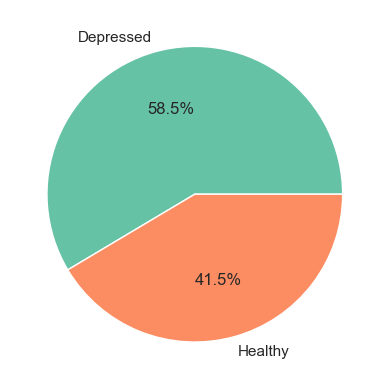

In [6]:
dep_count = df['Depression'].value_counts()
print(dep_count)

plt.pie(dep_count, labels=['Depressed', 'Healthy'], autopct='%1.1f%%')

#### *Feature 0 : id* ❌

Cette donnée est un identifiant unique pour chaque répondant. Elle n'a aucun impact sur le risque de dépression et sera donc exclue de notre modèle.

#### *Feature 1 : Gender* ❌

Le genre ne semble pas un facteur majeur de dépression. Nous ne l'utiliserons pas.

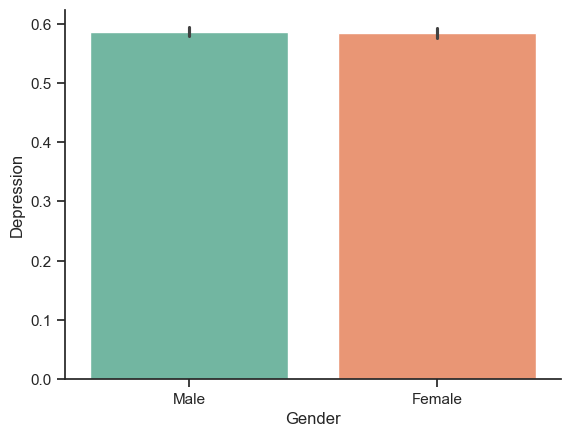

In [7]:
sns.barplot(data=df, x="Gender", y="Depression", hue="Gender")
sns.despine()

#### *Feature 2 : Age* ✅

On observe une nette différence d'âge médian entre les personnes en dépression et celles en bonne santé. Cette variable est intéressante à conserver. Quelques outliers que nous aurons à traiter apparaissent également.

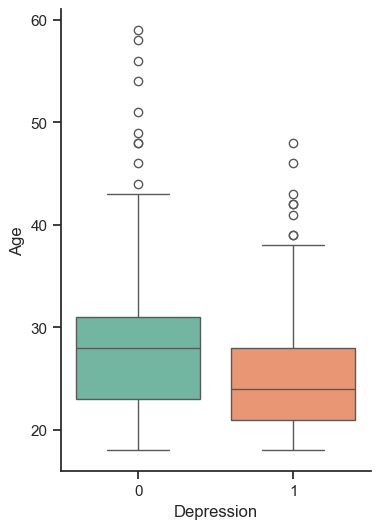

In [8]:
plt.figure(figsize=(4, 6))
sns.boxplot(data=df, x='Depression', y='Age', hue='Depression', legend=False)
sns.despine()

#### *Feature 3 : Cities* ❌

Même en filtrant les villes pour ne conserver que celles qui sont majoritaires (plus de 400 occurrences) cette feature ne semble pas avoir d'impact significatif sur le risque de dépression.

Nombre d'occurences pour chaque valeur :

City
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            969
Pune                     968
Ahmedabad                951
Bhopal                   934
Chennai                  885
Meerut                   825
Rajkot                   816
Delhi                    768
Bangalore                767
Ghaziabad                745
Mumbai                   699
Vadodara                 694
Varanasi                 685
Nagpur                   651
Indore                   643
Kanpur                   609
Nashik                   547
Faridabad                461
Saanvi                     2
Bhavna                     2
City                     

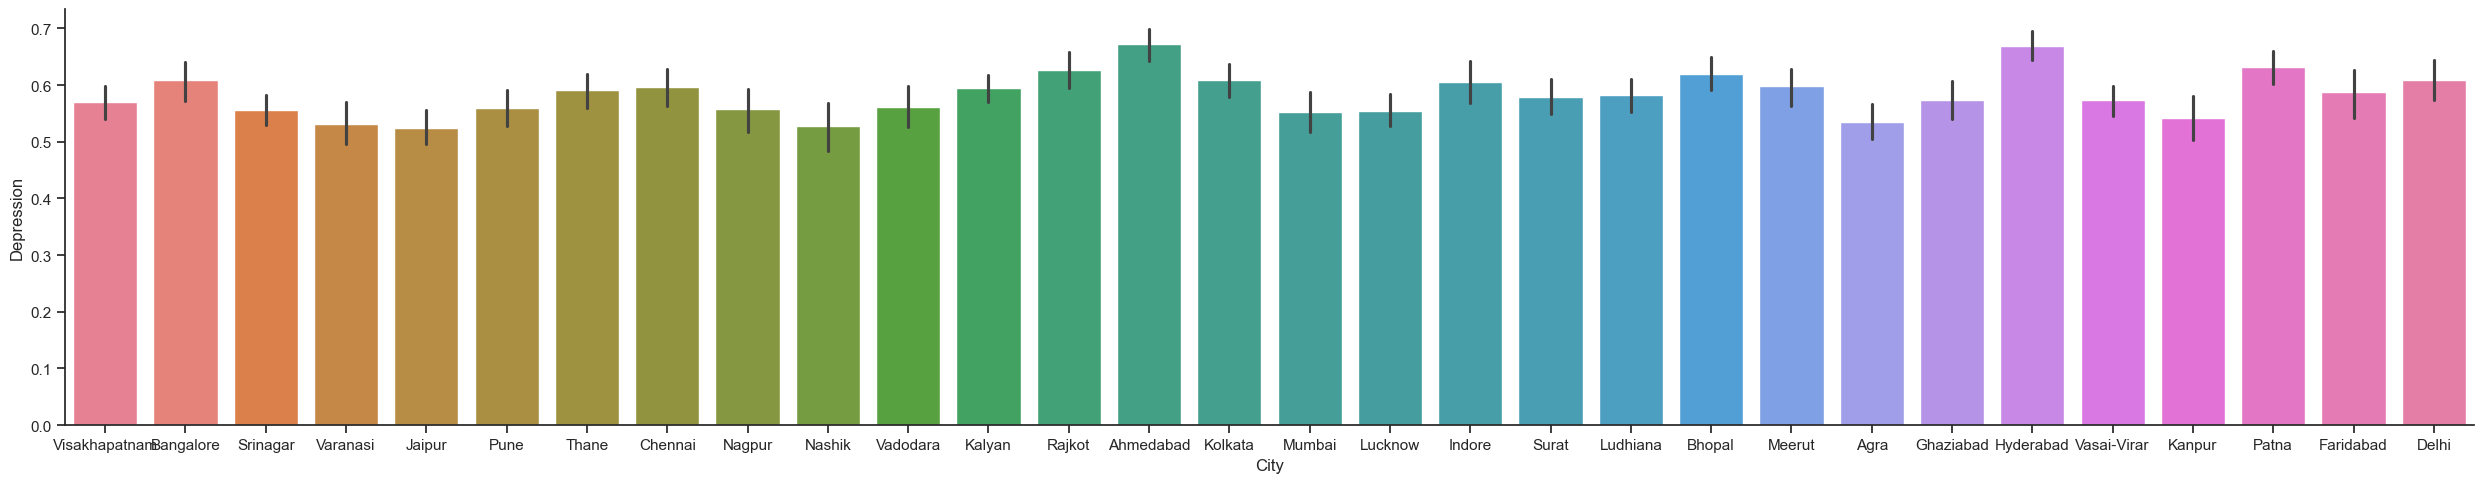

In [9]:
print("Nombre d'occurences pour chaque valeur :")
print()

city_counts = df['City'].value_counts()
print(city_counts)
print()

major_cities = city_counts[city_counts > 400].index
df_major_cities = df[df['City'].isin(major_cities)]

sns.catplot(data=df_major_cities, x='City', y='Depression', kind='bar', aspect=(5/1), hue='City')
sns.despine()


#### *Feature 4 : Profession* ❌

Notre sample étant composé à 99,9% d'étudiants, nous ne garderons pas cette feature.

In [10]:
print("Nombre d'occurences pour chaque valeur :")
print()

job_counts = df['Profession'].value_counts()
print(job_counts)
print()

job_percentage = (job_counts / job_counts.sum()) * 100
students = job_percentage['Student']
print(f"La part des étudiants et de : {students:.1f} %")

Nombre d'occurences pour chaque valeur :

Profession
Student                     27870
Architect                       8
Teacher                         6
'Digital Marketer'              3
'Content Writer'                2
Chef                            2
Doctor                          2
Pharmacist                      2
'Civil Engineer'                1
'UX/UI Designer'                1
'Educational Consultant'        1
Manager                         1
Lawyer                          1
Entrepreneur                    1
Name: count, dtype: int64

La part des étudiants et de : 99.9 %


#### *Feature 5 : Academic Pressure* ✅

Nous constatons que plus la pression académique ressentie est grande, plus le risque de dépression est important. Cette feature sera conservée dans notre modèle.

💡 Amélioration possible : supprimer les 0.03% de 0.0 qui ont une grande marge d'erreur et peuvent s'apparenter à une absence de réponse.

Nombre d'occurrences par valeur :
Academic Pressure
3.0    0.267446
5.0    0.225655
4.0    0.184760
1.0    0.172073
2.0    0.149744
0.0    0.000323
Name: proportion, dtype: float64


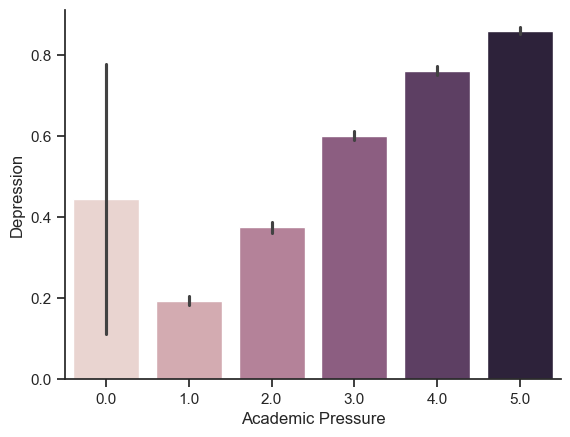

In [11]:
print("Nombre d'occurrences par valeur :")
print(df['Academic Pressure'].value_counts(normalize=True))

sns.barplot(data=df, x='Academic Pressure', y='Depression', hue='Academic Pressure', legend=False)
sns.despine()

#### *Feature 6 : Work Pressure* ❌

Tout comme nous avons retiré les professions de notre analyse, nous ne prendrons pas en compte la pression ressentie au travail dans la mesure où 99.9% des répondants ne travaillent pas et ont donc indiqué un niveau de pression à 0.0

In [12]:
print("Nombre d'occurences pour chaque valeur")
print()

df['Work Pressure'].value_counts()

Nombre d'occurences pour chaque valeur



Work Pressure
0.0    27898
5.0        2
2.0        1
Name: count, dtype: int64

#### *Feature 7 : CGPA* ❌

Les résultats scolaires sont exprimés sur une échelle de 0 à 10. Pour plus de lisibilité, nous avons arrondi ces valeurs. Nous constatons qu'il n'y a presque aucune valeur inférieure à 5, et qu'entre 5 et 10 le risque de dépression est relativement similaire. Nous ne conserverons pas cette feature.

Nombre d'occurences pour chaque valeur

cgpa_round
0.0        9
5.0     1789
6.0     6019
7.0     4858
8.0     5570
9.0     5954
10.0    3702
Name: count, dtype: int64


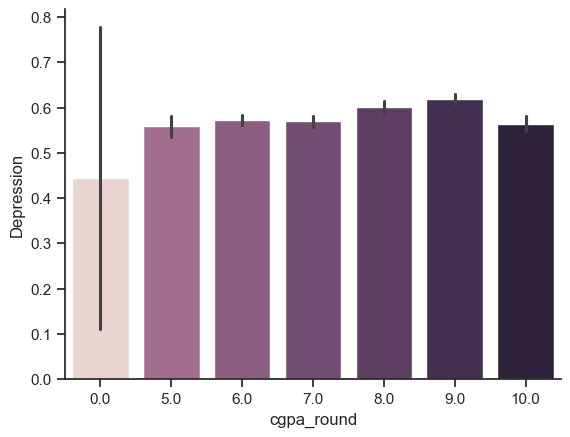

In [13]:
print("Nombre d'occurences pour chaque valeur")
print()

df["cgpa_round"] = df['CGPA'].round()
print(df['cgpa_round'].value_counts().sort_index())

sns.barplot(data=df, x='cgpa_round', y='Depression', hue='cgpa_round', legend=False)
sns.despine()

#### *Feature 8 : Study Satisfaction* ✅

Les répondants ont indiqué leur niveau de satisfaction sur une échelle de 0 à 5.
On constate une hausse du risque de dépression à mesure que le niveau de satisfaction baisse. Cette feature est importante pour notre modèle.

Les valeurs contenues dans cette colonne sont : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]



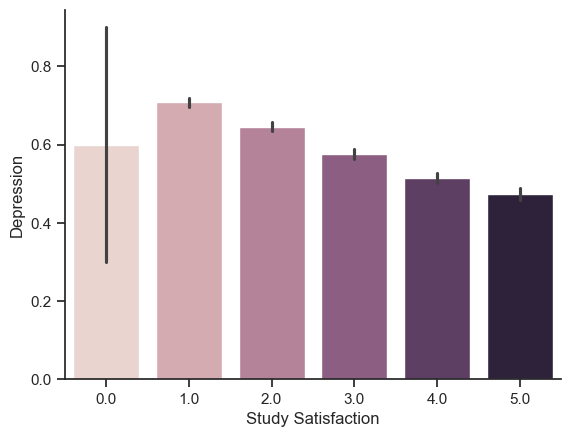

In [14]:
stdy_values = sorted(df['Study Satisfaction'].unique())
print(f"Les valeurs contenues dans cette colonne sont : {stdy_values}")
print()

sns.barplot(data=df, x='Study Satisfaction', y='Depression', hue='Study Satisfaction', legend=False)
sns.despine()

#### *Feature 9 : Job Satisfaction* ❌

A nouveau, nous excluons cette feature qui ne concerne qu'une infime partie de notre Dataset : les étudiants en emploi.

In [15]:
print("Nombre d'occurrences par valeur :")
print()

df['Job Satisfaction'].value_counts()

Nombre d'occurrences par valeur :



Job Satisfaction
0.0    27893
2.0        3
4.0        2
1.0        2
3.0        1
Name: count, dtype: int64

#### *Feature 10 : Sleep Duration* ✅

Le temps de sommeil semble avoir un impact sur le risque de dépression. Nous allons conserver cette feature mais il faudra prévoir d'en nettoyer les valeurs (18 'Others')

Nombre d'occurrences par valeur :

Sleep Duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
Others                   18
Name: count, dtype: int64



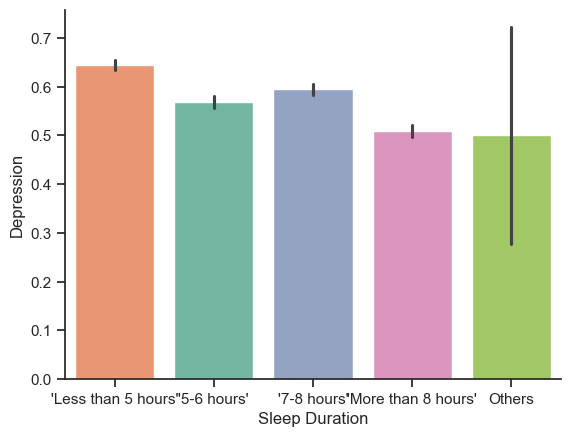

In [16]:
print("Nombre d'occurrences par valeur :")
print()

print(df['Sleep Duration'].value_counts())
print()

sns.barplot(
    data=df, x='Sleep Duration', 
    y='Depression', hue='Sleep Duration', 
    legend=False, 
    order=["'Less than 5 hours'", "'5-6 hours'", "'7-8 hours'", "'More than 8 hours'", 'Others']
    )

sns.despine()

#### *Feature 11 : Dietary Habits* ✅

Les habitudes alimentaires semblent avoir un impact énorme sur le risque de dépression. Nous garderons également cette variable après nettoyage des valeurs (12 'Others')

Nombre d'occurrences par valeur :

Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64



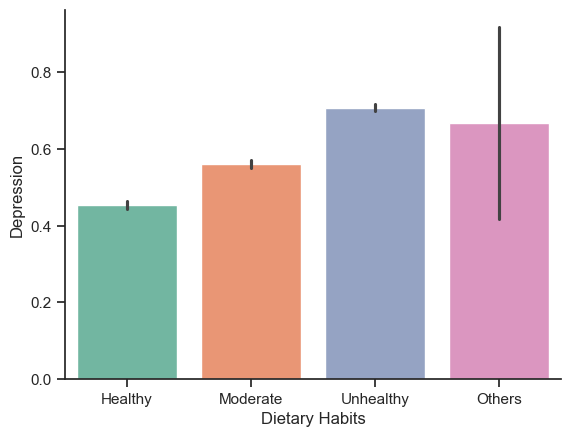

In [17]:
print("Nombre d'occurrences par valeur :")
print()

print(df['Dietary Habits'].value_counts())
print()

sns.barplot(data=df, x='Dietary Habits', y='Depression', hue='Dietary Habits', legend=False)
sns.despine()

#### *Feature 12 : Degree* ❌

Le dipôme ne semble pas significativement impacter le risque de dépression.

💡Nous pouvons tout de même noter que la 'Class 12' (équivalent à la Terminale en France) montre un pic de dépression en Inde. Il pourrait être intéressant de garder une variable booléenne indiquant si oui/non l'étudiant est en Class 12

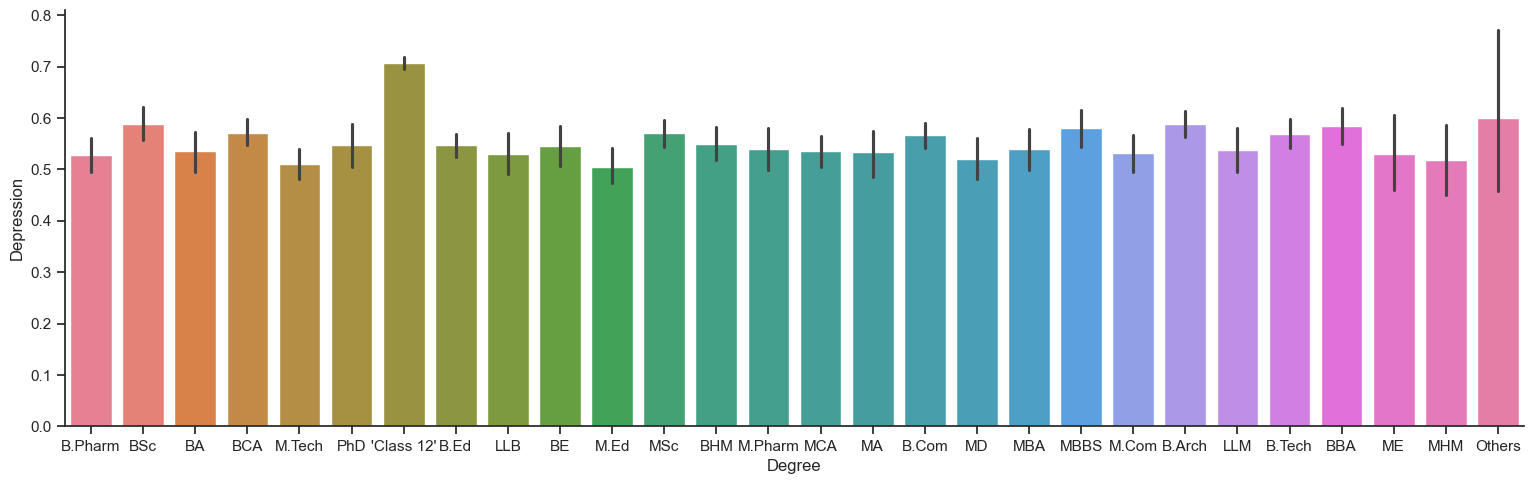

In [18]:
sns.catplot(data=df, x='Degree', y='Depression', hue='Degree', legend=False, kind="bar", aspect=3.1)
sns.despine()

#### *Feature 13 : Have you ever had suicidal thoughts?* ❌

Bien que cette donnée soit significativement corrélée à la présence de dépression, il semble qu'elle soit plus un symptôme de la maladie qu'un facteur de risque. Par sécurité, nous avons préféré l'exclure.

Nombre d'occurrences par valeur :

Have you ever had suicidal thoughts ?
Yes    17656
No     10245
Name: count, dtype: int64



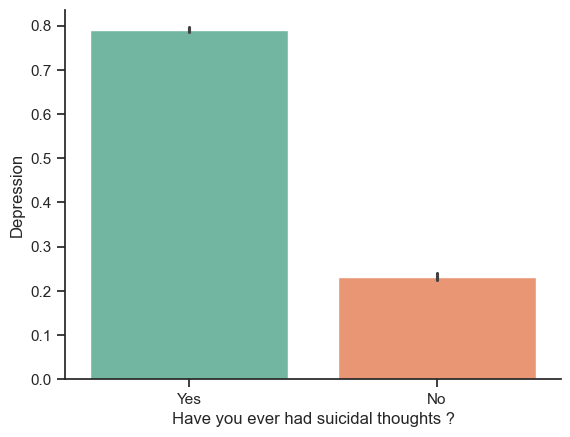

In [19]:
print("Nombre d'occurrences par valeur :")
print()

print(df['Have you ever had suicidal thoughts ?'].value_counts())
print()

sns.barplot(data=df, x='Have you ever had suicidal thoughts ?', y='Depression', hue='Have you ever had suicidal thoughts ?')
sns.despine()

#### *Feature 14 : Work/Study Hours* ✅

Il semble que le risque de dépression augmente avec le nombre d'heures consacrées quotidiennement aux études.

Nombre d'occurrences par valeur :

Work/Study Hours
10.0    4234
12.0    3172
11.0    2892
8.0     2509
6.0     2247
9.0     2026
7.0     2001
0.0     1700
4.0     1614
2.0     1590
3.0     1470
5.0     1296
1.0     1150
Name: count, dtype: int64



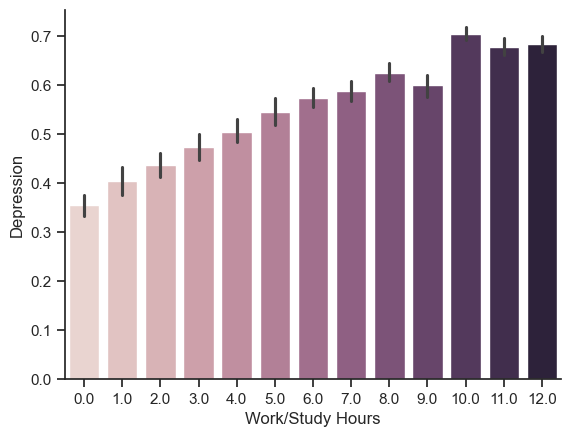

In [20]:
print("Nombre d'occurrences par valeur :")
print()

print(df['Work/Study Hours'].value_counts())
print()

sns.barplot(data=df, x='Work/Study Hours', y='Depression', hue='Work/Study Hours', legend=False)
sns.despine()

#### *Feature 15 : Financial Stress* ✅

Les difficultés financières ont de toute évidence un impact majeur sur le risque de dépression. Nous conserverons cette feature après avoir supprimé les 3 lignes contenant la valeur "?" pour que cette colonne ne contienne que des valeurs numériques.

Nombre d'occurrences par valeur :

Financial Stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
?         3
Name: count, dtype: int64



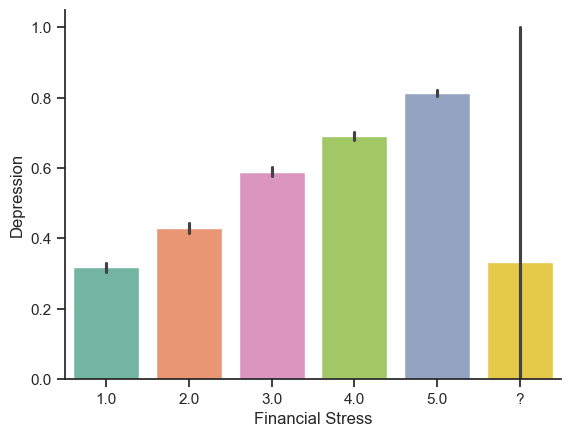

In [21]:
print("Nombre d'occurrences par valeur :")
print()

print(df['Financial Stress'].value_counts())
print()

sns.barplot(data=df, x='Financial Stress', y='Depression', hue='Financial Stress', legend=False, order=['1.0', '2.0', '3.0', '4.0', '5.0', '?'])
sns.despine()

#### *Feature 16 : Family History of Mental Illness* ✅

Il semble également que les antécédents familiaux de troubles mentaux soient un paramètre intéressant à conserver pour notre modèle, bien que son impact ne soit pas majeur.

Nombre d'occurrences par valeur :

Family History of Mental Illness
No     14398
Yes    13503
Name: count, dtype: int64



<Axes: xlabel='Family History of Mental Illness', ylabel='Depression'>

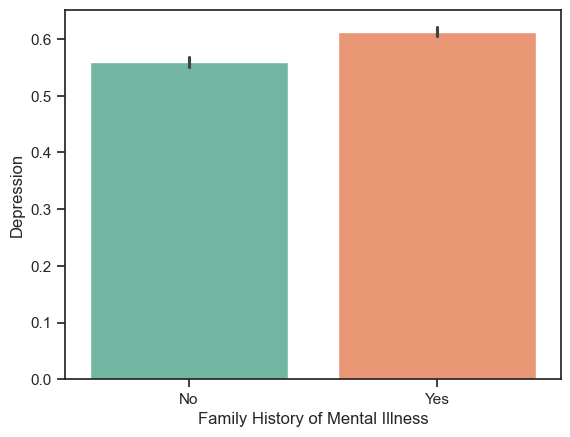

In [22]:
print("Nombre d'occurrences par valeur :")
print()

print(df['Family History of Mental Illness'].value_counts())
print()

sns.barplot(data=df, x='Family History of Mental Illness', y='Depression', hue='Family History of Mental Illness')

## Feature engineering ⚙️

#### Age - Suppression des outliers 🫧

Les plus de 43.5 ans sont des outliers et seront supprimés de notre dataset


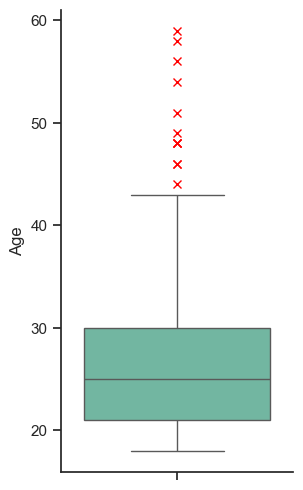

In [23]:
# Calcul des seuils pour détecter les outliers (règle de Tukey)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

print(f'Les plus de {upper_bound} ans sont des outliers et seront supprimés de notre dataset')

plt.figure(figsize=(3, 6))
sns.boxplot(y=df['Age'], flierprops={"marker": "x", "markeredgecolor": "#ff0000"})
sns.despine()

In [24]:
# Suppression des outliers

for x in df.index:
    if df.loc[x, 'Age'] > upper_bound:
        df.drop(x, inplace=True)

age_min = int(df['Age'].min())
age_max = int(df['Age'].max())

print(f"La tranche d'âges prise en compte est : {age_min}-{age_max} ans")

La tranche d'âges prise en compte est : 18-43 ans


#### *Sleep Duration - Suppression des 'Others'* 🫧

In [25]:
for x in df.index:
    if df.loc[x, "Sleep Duration"] == 'Others':
        df.drop(x, inplace=True)

#### *Dietary Habits - Suppression des 'Others'* 🫧

In [26]:
for x in df.index:
    if df.loc[x, "Dietary Habits"] == 'Others':
        df.drop(x, inplace=True)

#### *Financial Stress - Suppression des '?' et conversion en valeurs numériques* 🫧

In [27]:
for x in df.index:
    if df.loc[x, "Financial Stress"] == '?':
        df.drop(x, inplace=True)

df['Financial Stress'] = df['Financial Stress'].astype(float)
print('This feature is now of type : ', df['Financial Stress'].dtypes)

This feature is now of type :  float64


#### *Suppression des variables inutiles* ❌ *et renommage des variables conservées* ✅

In [28]:
df = df.drop(columns=[
    'id', 
    'Gender', 
    'City', 
    'Profession', 
    'Work Pressure', 
    'CGPA', 
    'Job Satisfaction', 
    'Degree', 
    'Have you ever had suicidal thoughts ?', 
    'cgpa_round'
    ])

df = df.rename(columns={
    'Academic Pressure': 'Pression', 
    'Study Satisfaction': 'Satisfaction', 
    'Sleep Duration': 'Sommeil', 
    'Dietary Habits': 'Alimentation', 
    'Work/Study Hours': 'Tps travail', 
    'Financial Stress': 'Diff. financières', 
    'Family History of Mental Illness': 'Antécédents'
    })

#### *Dataset Filtré* ✨

In [29]:
nb_col = len(df.columns)
nb_row = len(df)

print(f'Nous avons maintenant un tout nouveau et tout propre Dataset de {nb_col} colonnes et {nb_row} lignes')
print()
print('Les variables prises en compte sont :', sorted(df.columns))

Nous avons maintenant un tout nouveau et tout propre Dataset de 9 colonnes et 27856 lignes

Les variables prises en compte sont : ['Age', 'Alimentation', 'Antécédents', 'Depression', 'Diff. financières', 'Pression', 'Satisfaction', 'Sommeil', 'Tps travail']


## Preprocessing 🗃️

#### *Recherche de valeurs manquantes* 🔬

In [30]:
print("Valeurs manquantes :")
print()
NaN = df.isnull().sum()
print(NaN)

Valeurs manquantes :

Age                  0
Pression             0
Satisfaction         0
Sommeil              0
Alimentation         0
Tps travail          0
Diff. financières    0
Antécédents          0
Depression           0
dtype: int64


#### *X / y Split* ✂️

In [31]:
print("Splitting dataset into X and y...")
X = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]

y = df.loc[:,"Depression"]
print("...Done.")
print(X)

Splitting dataset into X and y...
...Done.
        Age  Pression  Satisfaction              Sommeil Alimentation  \
0      33.0       5.0           2.0          '5-6 hours'      Healthy   
1      24.0       2.0           5.0          '5-6 hours'     Moderate   
2      31.0       3.0           5.0  'Less than 5 hours'      Healthy   
3      28.0       3.0           2.0          '7-8 hours'     Moderate   
4      25.0       4.0           3.0          '5-6 hours'     Moderate   
...     ...       ...           ...                  ...          ...   
27896  27.0       5.0           5.0          '5-6 hours'    Unhealthy   
27897  27.0       2.0           3.0  'Less than 5 hours'      Healthy   
27898  31.0       3.0           4.0          '5-6 hours'    Unhealthy   
27899  18.0       5.0           2.0  'Less than 5 hours'      Healthy   
27900  27.0       4.0           1.0  'Less than 5 hours'      Healthy   

       Tps travail  Diff. financières Antécédents  
0              3.0          

#### *Train / Test Split* ✂️

In [32]:
print("Splitting dataset into train set and test set...")
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y) # Allows you to stratify your sample. 
                                                                # Meaning, you will have the same
                                                                # proportion of categories in test 
                                                                # and train set

print("...Done.")                                                                

Splitting dataset into train set and test set...
...Done.


#### *Feature Encoder* 🎛️

In [33]:
### Training pipeline ###
print("--- Training pipeline ---")
print()  

# Encoding categorical features and standardizing numeric features

print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print()

print("Encoding categorical features and standardizing numerical features...")


numeric_features = [0, 1, 2, 5, 6]
numeric_transformer = StandardScaler()

ordinal_features = [3, 4]
sleep_order = ["'Less than 5 hours'", "'5-6 hours'", "'7-8 hours'", "'More than 8 hours'"]
food_order = ['Unhealthy', 'Moderate', 'Healthy']
ordinal_transformer = OrdinalEncoder(categories=[sleep_order, food_order])

categorical_features = [7]
categorical_transformer = OneHotEncoder(drop="first")

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print("#### X_train AFTER preprocessing ####")
print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

--- Training pipeline ---

#### X_train BEFORE preprocessing ####
        Age  Pression  Satisfaction              Sommeil Alimentation  \
14413  25.0       1.0           1.0  'Less than 5 hours'     Moderate   
7946   30.0       3.0           2.0  'Less than 5 hours'     Moderate   
15714  33.0       5.0           2.0  'More than 8 hours'    Unhealthy   
12610  33.0       5.0           2.0          '5-6 hours'    Unhealthy   
16704  23.0       2.0           3.0          '7-8 hours'    Unhealthy   

       Tps travail  Diff. financières Antécédents  
14413          6.0                2.0         Yes  
7946           9.0                1.0         Yes  
15714         11.0                3.0          No  
12610         10.0                2.0          No  
16704          2.0                3.0         Yes  

Encoding categorical features and standardizing numerical features...
...Done.
#### X_train AFTER preprocessing ####
[[ 1.         -0.16258134 -1.54680293 -1.42673883 -0.31884687 -0.

## Régression Logistique 📈

#### Training & Predictions 🔮

In [34]:
# Training model 
print("Training model...")
classifier = LogisticRegression(random_state = 0) # Instanciate model 
classifier.fit(X_train, y_train) # Fit model
print("...Done.")

Training model...
...Done.


In [35]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print()

print("#### First five predictions on TRAIN set ####")
print(y_train_pred[0:5])

Predictions on train set...
...Done.

#### First five predictions on TRAIN set ####
[0 0 1 1 0]


In [36]:
### Test pipeline ###
print("--- Test pipeline ---") 

# Encoding categorical features and standardizing numeric features
print("Encoding categorical features and standardizing numerical features...")
print()

X_test = feature_encoder.transform(X_test)
print("...Done.")

print("#### X_test AFTER preprocessing ####")
print(X_test[0:5,:])
print()

--- Test pipeline ---
Encoding categorical features and standardizing numerical features...

...Done.
#### X_test AFTER preprocessing ####
[[ 1.          1.27379942  1.34385741  0.77304309  0.4928958  -0.79665446
   0.          2.        ]
 [ 1.         -1.1885676   1.34385741  0.77304309  0.4928958  -0.79665446
   0.          2.        ]
 [ 0.          1.27379942 -0.82413785  0.77304309  0.76347669 -0.79665446
   2.          2.        ]
 [ 1.         -0.98337035  0.62119232 -1.42673883  0.4928958  -1.49313717
   2.          1.        ]
 [ 1.          0.45301041  1.34385741 -1.42673883  0.22231491  0.59631097
   3.          2.        ]]



In [37]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print()

print("#### First five predictions on TEST set ####")
print(y_train_pred[0:5])

Predictions on test set...
...Done.

#### First five predictions on TEST set ####
[0 0 1 1 0]


#### *Assessment of performances* 💯

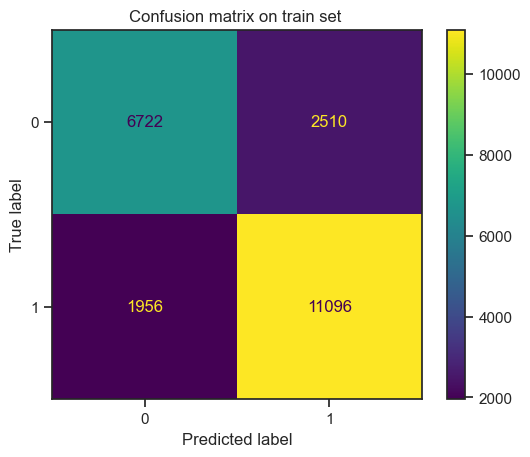

accuracy-score on train set :  0.7995871477293125


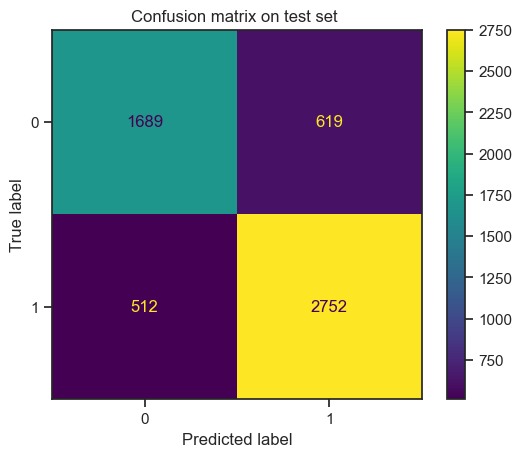

accuracy-score on test set :  0.7970208183776023


In [38]:
# Plot confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train set ")
plt.show()
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on test set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))


#### *Feature importance* 📊

In [39]:
# Check coefficients 

print("coefficients are: ", classifier.coef_) 
print("Constant is: ", classifier.intercept_)

# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])

# Print categorical columns
categorical_column_names = feature_encoder.transformers_[0][1].get_feature_names_out()
print("Categorical columns are: ", categorical_column_names)

# Print ordinal columns
ordinal_column_names = X.columns[ordinal_features]
print("ordinal columns are: ", ordinal_column_names)

# Print numerical columns
numerical_column_names = X.columns[numeric_features]
print("numerical columns are: ", numerical_column_names)

# Append all columns 
all_column_names = (
    list(categorical_column_names) + 
    list(ordinal_column_names) + 
    list(numerical_column_names)
)
print("All column names are: ", all_column_names)

# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":classifier.coef_.squeeze() # CAREFUL HERE. We need to access first index of our list because 
                                            # Data needs to be 1 dimensional
                                            # That's what .squeeze() is for
})

feature_importance


coefficients are:  [[ 0.26023313 -0.52263073  1.16894628 -0.32665489  0.42864411  0.80348026
  -0.19368019 -0.53553746]]
Constant is:  [1.18472221]
All transformers are:  [('cat', OneHotEncoder(drop='first'), [7]), ('num', StandardScaler(), [0, 1, 2, 5, 6]), ('ord', OrdinalEncoder(categories=[["'Less than 5 hours'", "'5-6 hours'", "'7-8 hours'",
                            "'More than 8 hours'"],
                           ['Unhealthy', 'Moderate', 'Healthy']]), [3, 4])]
One Hot Encoder transformer is:  OneHotEncoder(drop='first')
Categorical columns are:  ['Antécédents_Yes']
ordinal columns are:  Index(['Sommeil', 'Alimentation'], dtype='object')
numerical columns are:  Index(['Age', 'Pression', 'Satisfaction', 'Tps travail', 'Diff. financières'], dtype='object')
All column names are:  ['Antécédents_Yes', 'Sommeil', 'Alimentation', 'Age', 'Pression', 'Satisfaction', 'Tps travail', 'Diff. financières']


,feature_names,coefficients
0,Antécédents_Yes,0.260233
1,Sommeil,-0.522631
2,Alimentation,1.168946
3,Age,-0.326655
4,Pression,0.428644
5,Satisfaction,0.803480
6,Tps travail,-0.193680
7,Diff. financières,-0.535537


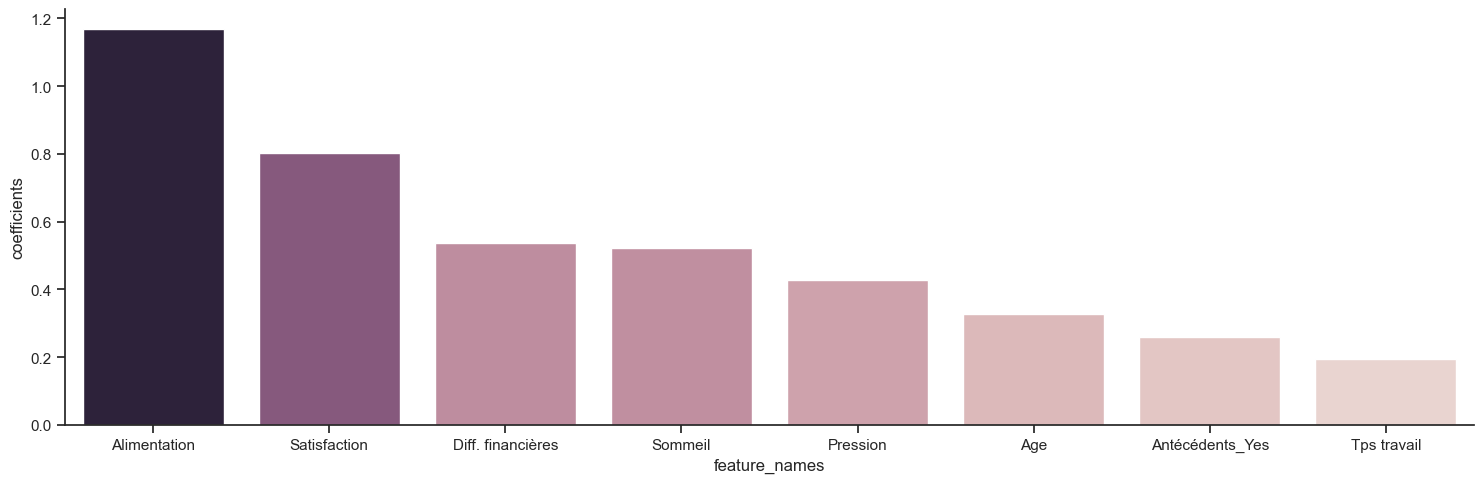

In [40]:
# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            hue="coefficients",
            aspect=3/1,
            legend=False)

## Decision Tree 🌳

#### Training & Predictions 🔮

In [ ]:
# Training model
print("Training model...")
classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [42]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [43]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



#### *Assessment of performances* 💯

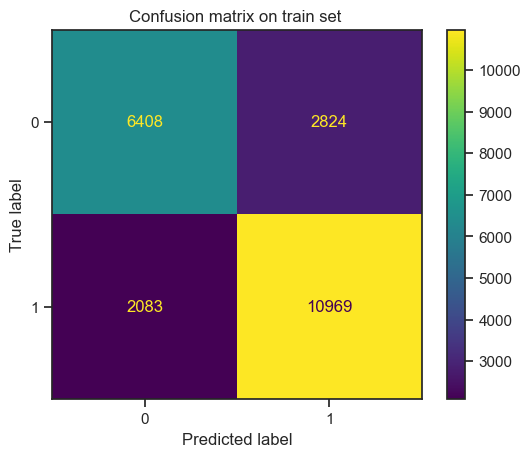

accuracy-score on train set :  0.7797971638844013


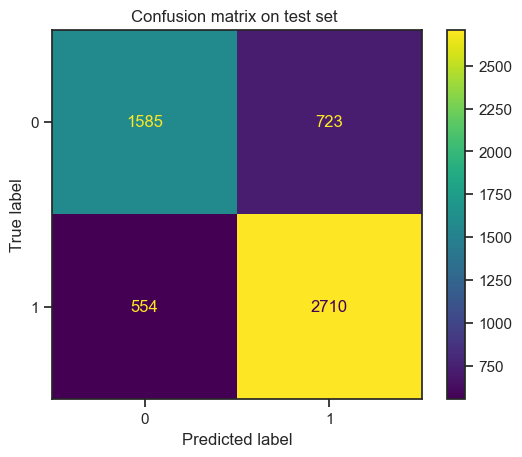

accuracy-score on test set :  0.7708183776022972


In [44]:
# Plot confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train set ")
plt.show()
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on test set ")
plt.show()
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

#### *Feature importance* 📊

In [45]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": classifier.feature_importances_
                                        
})

feature_importance

,feature_names,coefficients
0,Antécédents_Yes,0.000000
1,Sommeil,0.079616
2,Alimentation,0.624162
3,Age,0.001970
4,Pression,0.044843
5,Satisfaction,0.224828
6,Tps travail,0.000000
7,Diff. financières,0.024581


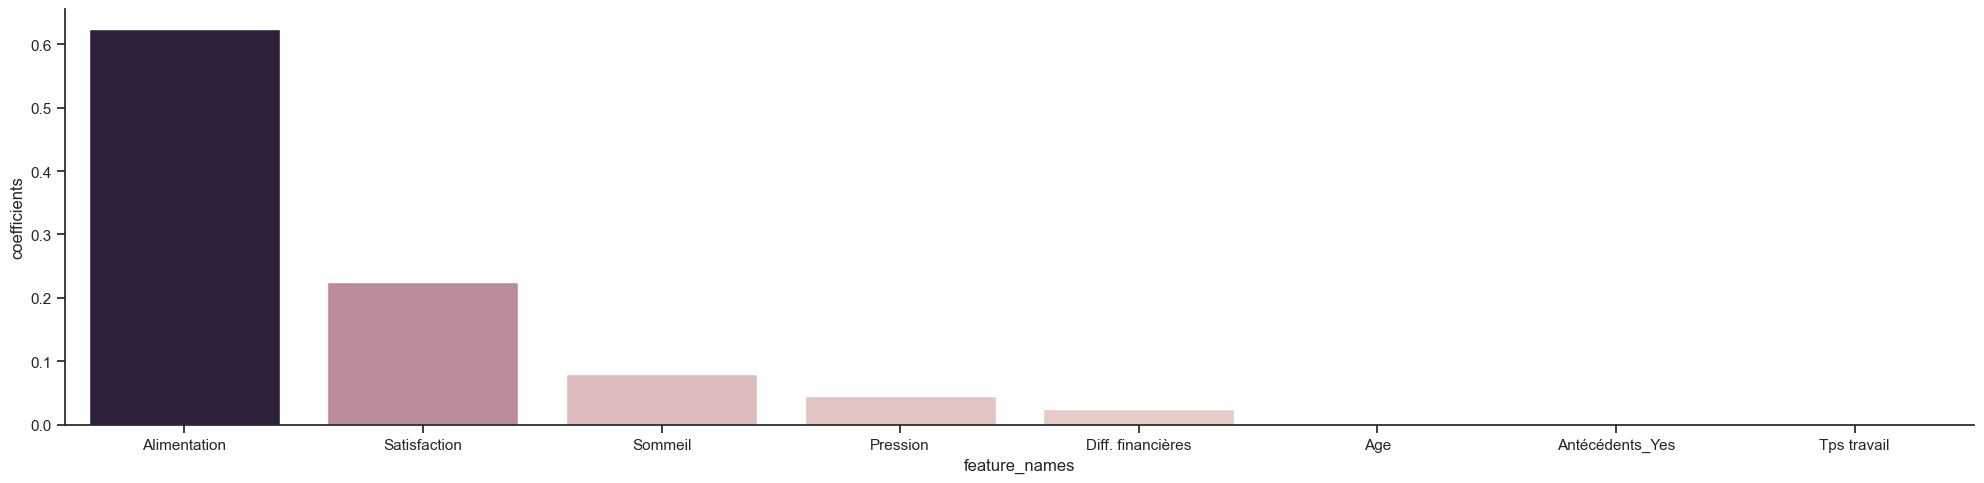

In [46]:
# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=4/1,
            hue="coefficients",
            legend=False) # Resize graph

## Random forest 🌳🌳🌳🌳

#### Trainin & Predictions 🔮

In [47]:
# Training model
print("Training model...")
classifier = RandomForestClassifier(n_estimators = 30)
classifier.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [48]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [49]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



#### *Assessment of performances* 💯

--- Assessment of performances ---


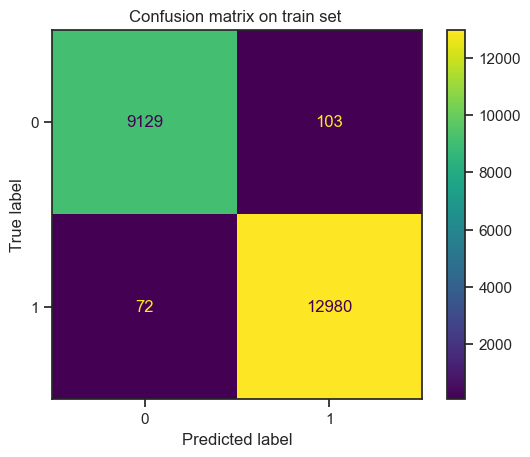

accuracy-score on train set :  0.9921468318075749


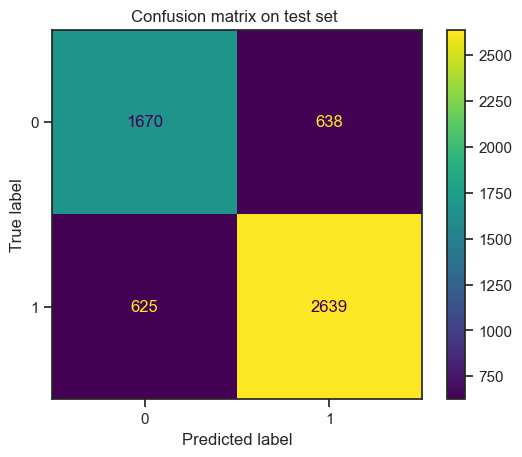

accuracy-score on test set :  0.7733309404163675


In [50]:
### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on test set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

#### Recherche des meilleurs hyperparamètres - Grid Search 🔍

Dans notre cas, le recall est important car on cherche à identifier des personnes à risque. Par précaution, on préfèrera identifier à tort des personnes non-dépressives plutôt que de rater des personnes dépressives. On privilégiera donc le modèle avec le meilleur score de recall.

In [51]:
from sklearn.metrics import precision_score, recall_score

max_depth_to_test = [1, 2, 3]
n_estimators_to_test = [100, 1000, 5000]

i = 1
best_recall = 0
best_model = None
best_params = {}
results = []

for max_depth in max_depth_to_test:
    for n_estimators in n_estimators_to_test:
        classifier = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=42)
        classifier.fit(X_train, y_train)
        
        y_pred_test = classifier.predict(X_test)
        y_pred_train = classifier.predict(X_train)
        
        accuracy_test = classifier.score(X_test, y_test)
        precision_test = precision_score(y_test, y_pred_test, zero_division=0)
        recall_test = recall_score(y_test, y_pred_test, zero_division=0)
        
        accuracy_train = classifier.score(X_train, y_train)
        
        print(f"____ Report model {i} ____")
        print("max_depth:", max_depth)
        print("n_estimators:", n_estimators)
        print(f"Test recall    : {recall_test * 100:.2f} %")
        print(f"Test precision : {precision_test * 100:.2f} %")
        print(f"Test accuracy  : {accuracy_test * 100:.2f} %") 
        print(f"Train accuracy : {accuracy_train * 100:.2f} %\n")

        # Garder le modèle avec le meilleur recall
        if (recall_test > best_recall):
            best_recall = recall_test
            best_model = classifier
            best_params = {'max_depth': max_depth, 'n_estimators': n_estimators}
        
        # Stocker les résultats
        results.append({
            'model': f'depth={max_depth}, trees={n_estimators}',
            'accuracy': accuracy_test,
            'precision': precision_test,
            'recall': recall_test
        })

        i += 1


____ Report model 1 ____
max_depth: 1
n_estimators: 100
Test recall    : 94.64 %
Test precision : 69.81 %
Test accuracy  : 72.88 %
Train accuracy : 72.90 %

____ Report model 2 ____
max_depth: 1
n_estimators: 1000
Test recall    : 95.71 %
Test precision : 68.64 %
Test accuracy  : 71.88 %
Train accuracy : 71.78 %

____ Report model 3 ____
max_depth: 1
n_estimators: 5000
Test recall    : 96.38 %
Test precision : 68.05 %
Test accuracy  : 71.37 %
Train accuracy : 71.19 %

____ Report model 4 ____
max_depth: 2
n_estimators: 100
Test recall    : 89.22 %
Test precision : 74.32 %
Test accuracy  : 75.63 %
Train accuracy : 76.50 %

____ Report model 5 ____
max_depth: 2
n_estimators: 1000
Test recall    : 90.47 %
Test precision : 73.94 %
Test accuracy  : 75.74 %
Train accuracy : 76.59 %

____ Report model 6 ____
max_depth: 2
n_estimators: 5000
Test recall    : 91.82 %
Test precision : 73.51 %
Test accuracy  : 75.83 %
Train accuracy : 76.14 %

____ Report model 7 ____
max_depth: 3
n_estimators: 10

In [52]:
print("🥇____ Champion Model ____🥇")
print(f"Parameters: {best_params}")
print(f"Test recall    : {best_recall * 100:.2f} %")
print(f"Test precision : {precision_score(y_test, best_model.predict(X_test), zero_division=0) * 100:.2f} %")
print(f"Test accuracy  : {best_model.score(X_test, y_test) * 100:.2f} %")
print(f"Train accuracy : {best_model.score(X_train, y_train) * 100:.2f} %")

classifier = best_model

🥇____ Champion Model ____🥇
Parameters: {'max_depth': 1, 'n_estimators': 5000}
Test recall    : 96.38 %
Test precision : 68.05 %
Test accuracy  : 71.37 %
Train accuracy : 71.19 %


#### *Feature importance* 📊

In [53]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": classifier.feature_importances_
                                        
})

feature_importance

,feature_names,coefficients
0,Antécédents_Yes,0.0000
1,Sommeil,0.1846
2,Alimentation,0.2476
3,Age,0.0662
4,Pression,0.1146
5,Satisfaction,0.2152
6,Tps travail,0.0366
7,Diff. financières,0.1352


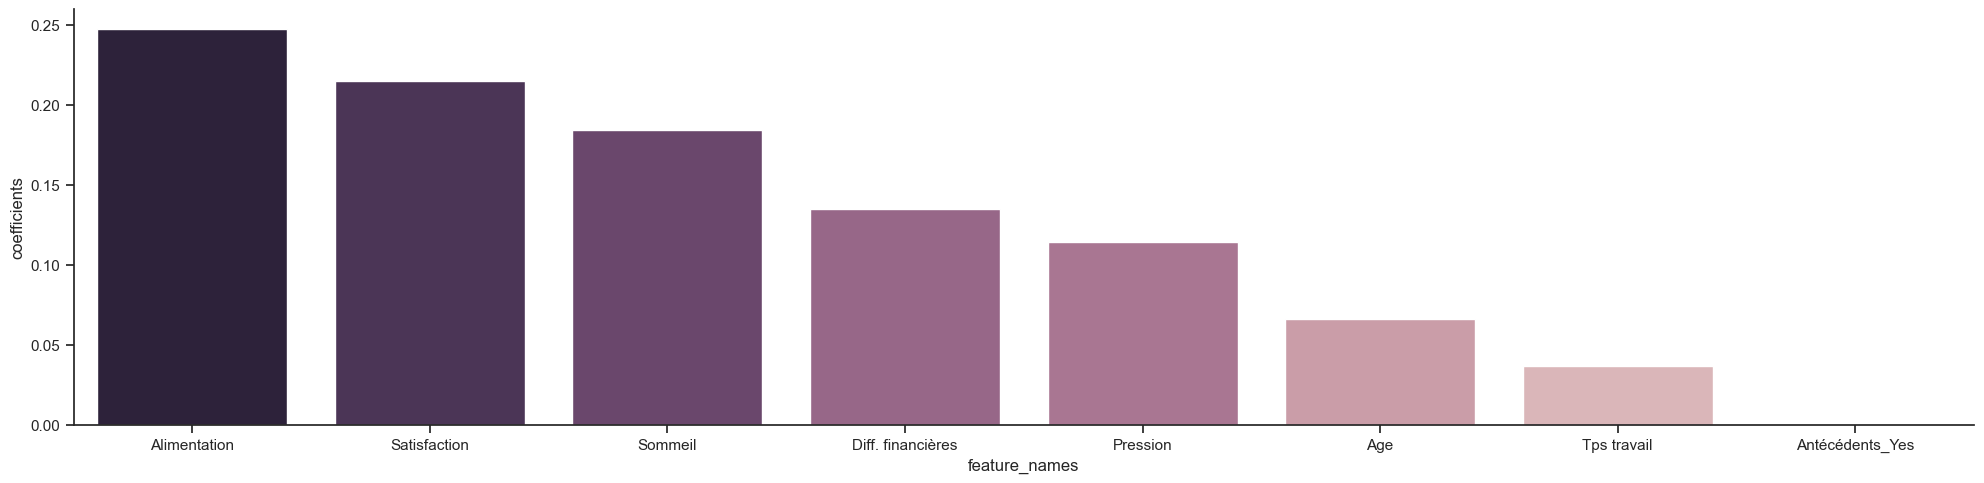

In [54]:
# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=4/1,
            hue="coefficients",
            legend=False)